In [1]:
import matplotlib.pyplot as plt
from one_dimensional_search import dichotomy, golden_ratio, fibonacci, line_search

# №1

In [8]:
def build_one_dimen_plots(method, func, plot_name):
    left = -1000
    right = 200
    epsilons = [0.1 * deg for deg in range(1, 9)]
    iters = []
    for epsilon in epsilons:
        res, it, _, _ = method(func, left, right, epsilon)
        iters.append(it)
    
    eps = 0.3
    _, iter_num, a, b = method(func, left, right, eps)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    fig.suptitle(plot_name, fontsize=16)
    ax1.plot(epsilons, iters, '.-')
    ax1.set_title('Iterations to epsilon')

    iterations = [(i + 1) for i in range(iter_num)]
    ax2.plot(iterations, a, '.-')
    ax2.plot(iterations, b, '.-')
    ax2.set_title('Line to iteration')

In [9]:
function = lambda x: x ** 2

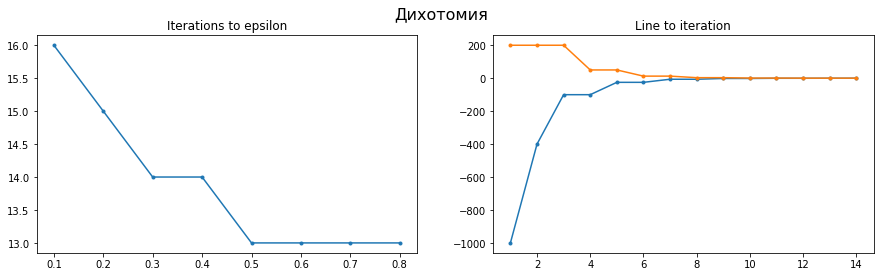

In [10]:
build_one_dimen_plots(dichotomy, function, "Дихотомия")

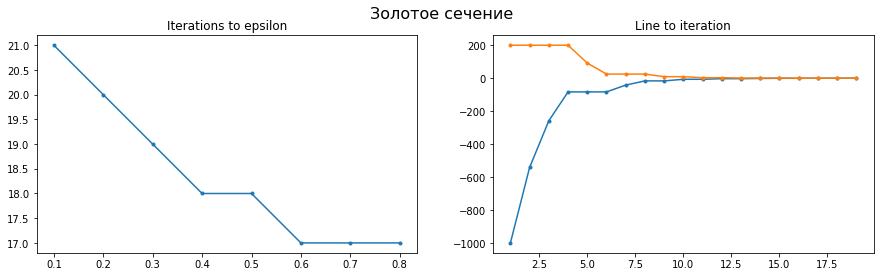

In [11]:
build_one_dimen_plots(golden_ratio, function, "Золотое сечение")

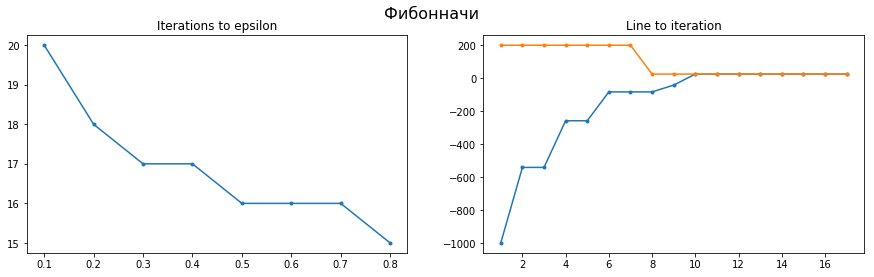

In [12]:
build_one_dimen_plots(fibonacci, function, "Фибонначи")

In [13]:
line_search(function, -180, 1e-3)

475.35

# №2

In [14]:
import matplotlib.ticker as ticker
import numpy as np

In [24]:
def build_gradient_plot(func, func_grad, x):
    one_dim_methods = [dichotomy, golden_ratio, fibonacci]
    one_dim_methods_name = ["Дихотомия", "Золотое сечение", "Фибонначи", "Постоянный шаг"]
    iters_num = []
    for method in one_dim_methods:
        res = gradient_descent(func, func_grad, x, method, eps=1e-3)
        iters_num.append(res)
    
    const_res = gradient_descent(func, func_grad, x, None, True)
    print(const_res)
    fig, ax = plt.subplots()
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
        
    y_pos = np.arange(len(one_dim_methods))
    ax.barh(y_pos, iters_num, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(one_dim_methods_name)
    ax.invert_yaxis()
    ax.set_xlabel('iterations')
    ax.set_title('Gradient convergence')

In [25]:
def gradient_descent(func, func_grad, x, step_search_method, const_step=False, step=1e-5, eps=1e-3):

    y = func(x)
    step_number = 0
    while True:
        step_number += 1
        grad = func_grad(x)
        if not const_step:
            step = get_step(func, x, grad, step_search_method)
        next_x = x - step * grad
        next_y = func(next_x)
        if abs(next_y - y) < eps:
            return step_number
        x = next_x
        y = next_y


def get_step(function, x, grad, search_method):
    def optimization_problem(alpha):
        return function(x - alpha * grad)
    right_border = line_search(optimization_problem, 0)
    res, _, _, _ = search_method(optimization_problem, 0, right_border)
    return res

In [26]:
function = lambda x: x ** 2
function_grad = lambda x: 2 * x

149786


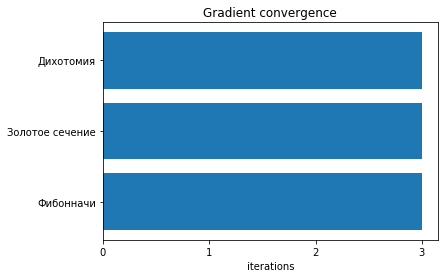

In [27]:
build_gradient_plot(function, function_grad, -100)

# №3
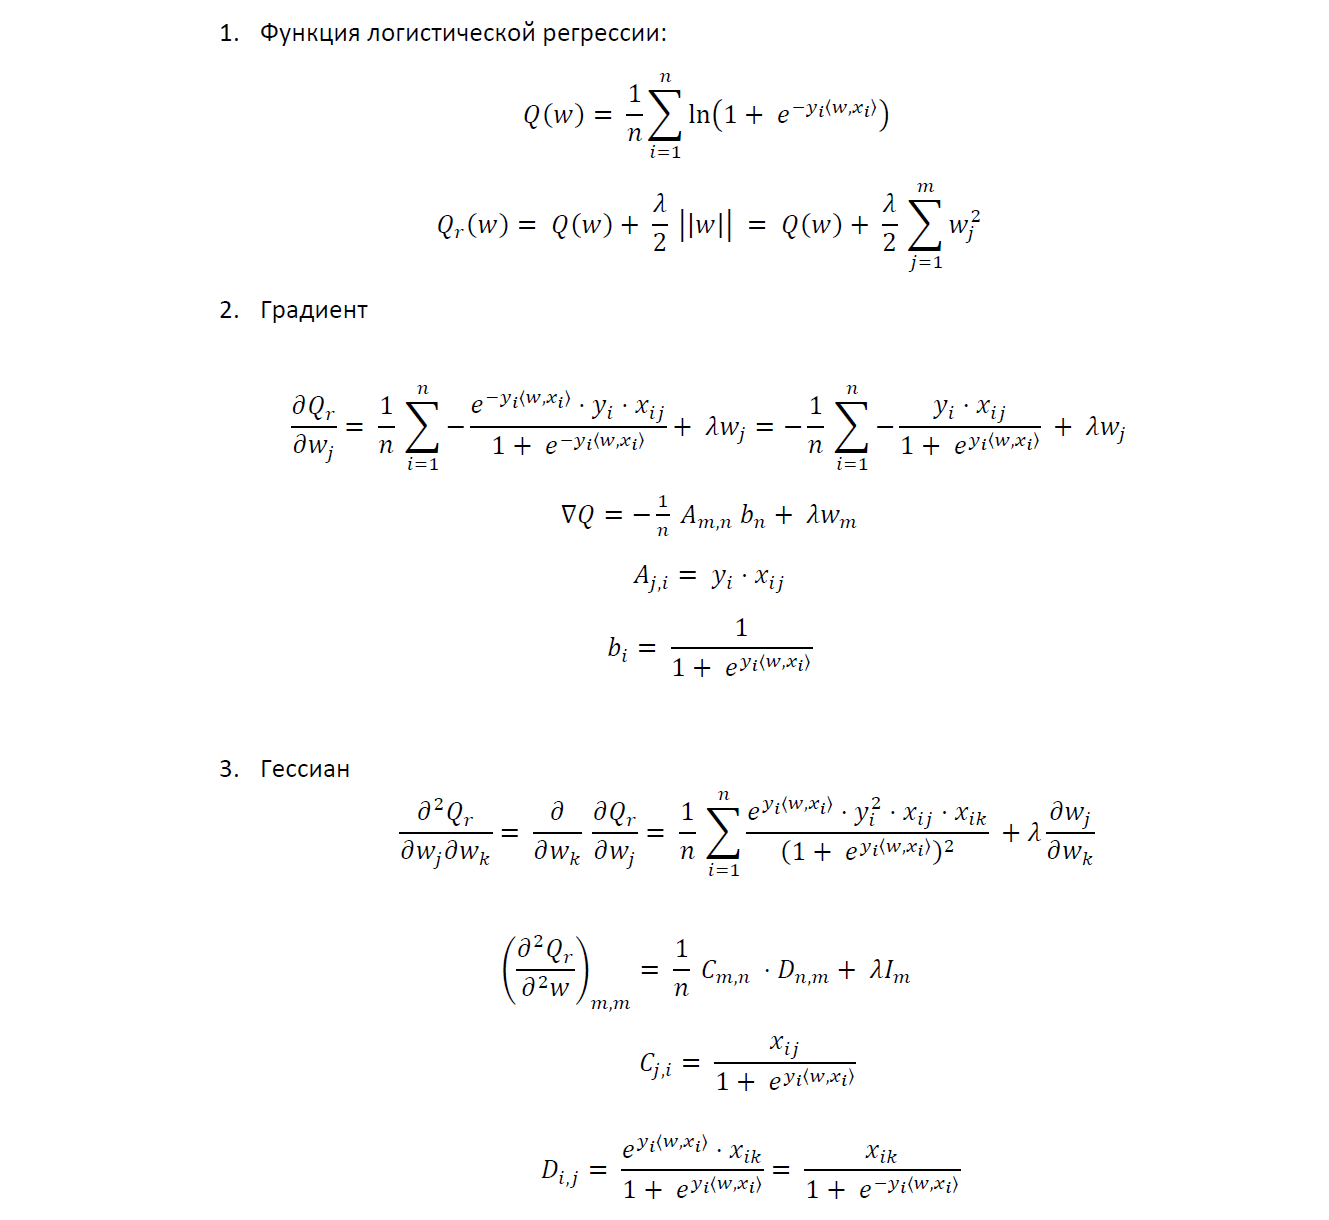

# №4

In [ ]:
class Logistic:
	def __init__(self, lmb, learning_rate, amount_steps=10000, eps=1e-5):
		self.lmb = lmb
		self.learning_rate = learning_rate
		self.amount_steps = amount_steps
		self.eps = eps
		self.w = None

	def __init_weight(self, m):
		self.w = np.random.normal(loc=0., scale=1., size=m)

	def __evaluate_Q(self, X, y, n):
		predictions = np.matmul(X, self.w)
		margins = predictions * y
		losses = np.logaddexp(0, -margins)
		return 1 / n * losses + self.lmb / 2 * np.sum(np.square(self.w))

	def __evaluate_gradient_Q(self, X, y, n):
		predictions = np.matmul(X, self.w)
		margins = predictions * y
		b = expit(-margins)
		A = np.transpose(X * y.reshape((n, 1)))
		return -1 / n * np.matmul(A, b) + self.lmb * self.w

	def __evaluate_hessian_Q(self, X, y, n):
		predictions = np.matmul(X, self.w)
		margins = predictions * y
		C = np.transpose(X * expit(-margins).reshape((n, 1)))
		D = X * expit(margins).reshape((n, 1))
		return 1 / n * np.matmul(C, D) + self.lmb * np.eye(m)

	def fit(self, X, y):
		n, m = X.shape
		self.__init_weight(m)
		Q = self.__evaluate_Q(X, y, n)
		for s in range(self.amount_steps):
			self.w = self.w - self.learning_rate * self.__evaluate_gradient_Q(X, y, n)

			new_Q = self.__evaluate_Q(X, y, n)
			if np.linalg.norm(new_Q - Q) < self.eps:
				break
			Q = new_Q

	def predict(self, X):
		return [np.sign(np.dot(x_i, self.w)) for x_i in X]